# Example 1 with SO2

In [2]:
from manifpy import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

## 2d plot

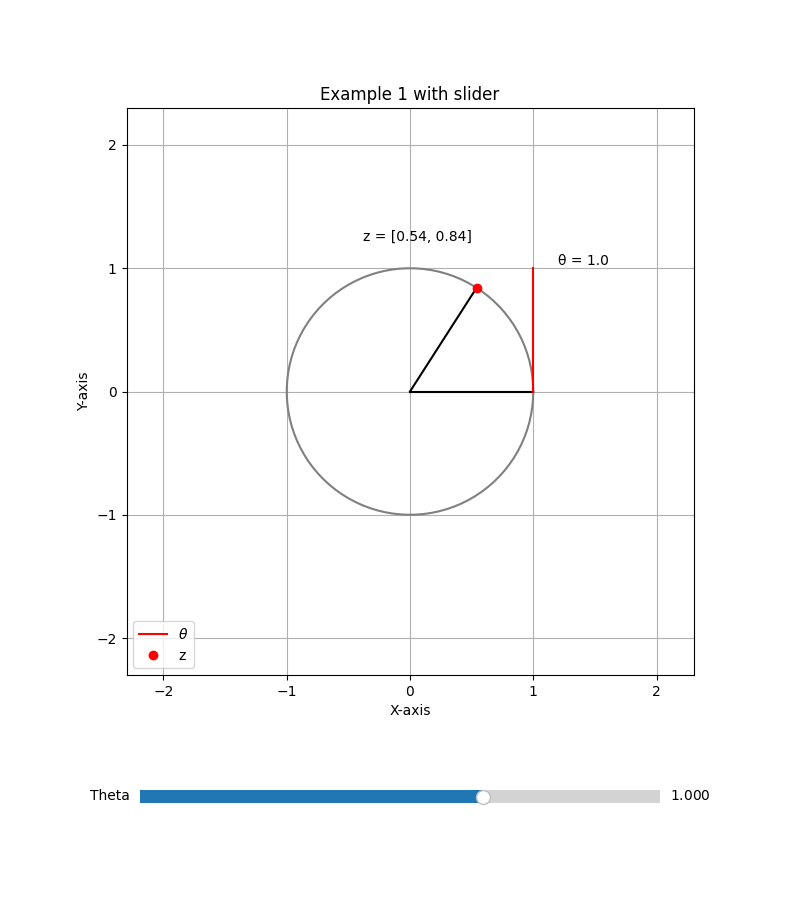

In [3]:
def update(val):
    dstate = SO2Tangent(val) 
    
    state = dstate.exp()
    
    dot.set_data([state.real()], [state.imag()])
    line.set_data([0, state.real()], [0, state.imag()])
    red_line.set_data([1, 1], [0, val])
    text.set_text(f'z = [{state.coeffs()[0]:.2f}, {state.coeffs()[1]:.2f}]')
    
    theta_value = val
    theta_text.set_text(f'\u03B8 = {theta_value:.2f}')
    
    plt.draw()

fig, ax = plt.subplots(figsize=(8, 9))
plt.subplots_adjust(bottom=0.25)
ax.set_title("Example 1 with slider")
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), color='grey')

dstate = SO2Tangent(1)
state = dstate.exp()

line, = ax.plot([0, state.real()], [0, state.imag()], 'k-')  
ax.plot([0, 1], [0, 0], 'k-')  
red_line, = ax.plot([1, 1], [0, dstate.coeffs()[0]], 'r-', label=r'$\theta$') 

dot, = ax.plot(state.real(), state.imag(), 'ro', label='z')
text = ax.text(0.5, 1.2, f'z = [{state.coeffs()[0]:.2f}, {state.coeffs()[1]:.2f}]', verticalalignment='bottom', horizontalalignment='right')

theta_value = dstate.coeffs()[0]
theta_text = ax.text(1.2, 1, f'\u03B8 = {theta_value}', verticalalignment='bottom')

slider_w = 0.65
slider_h = 0.03
slider_l = (1 - slider_w) / 2
slider_b = 0.1
ax_th = plt.axes([slider_l, slider_b, slider_w, slider_h])
slider_re = Slider(ax_th, 'Theta', -np.pi, np.pi, valinit=dstate.coeffs()[0])

slider_re.on_changed(update)
slider_re.valmin =-np.pi
slider_re.valmax = np.pi

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_aspect('equal')
ax.legend(loc='lower left')
ax.set_xlim(-2.3, 2.3)
ax.set_ylim(-2.3, 2.3)
ax.grid(True)
plt.show()

## 3d

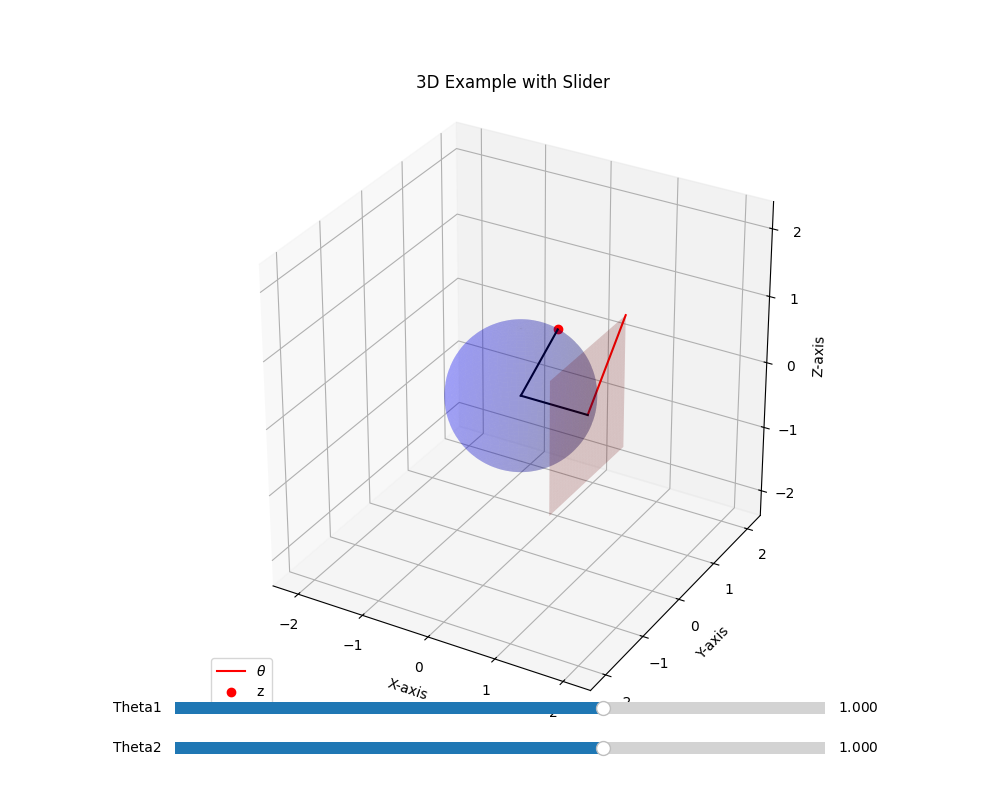

In [6]:
def update(val):
    theta1 = slider_theta1.val
    theta2 = slider_theta2.val
    dstate = SO3Tangent(np.array([0, -theta2, theta1]))
    state = dstate.exp()
    R = state.rotation()
    x, y, z = R[:, 0]
    
    line.set_data([0, x], [0, y])
    line.set_3d_properties([0, z])
    
    red_line.set_data([1, 1], [0, theta1])
    red_line.set_3d_properties([0, theta2])
    
    dot.set_data([x], [y])
    dot.set_3d_properties([z])
    
    text.set_text(f'z = [{x:.2f}, {y:.2f}, {z:.2f}]')
    
    theta_text.set_text(f'\u03B8 = [0, {theta1:.2f}, {theta2:.2f}]')
    
    plt.draw()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Example with Slider")

# Plotting the unit circle
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.2)

x_plane = np.ones(100)
y_plane = np.linspace(-1, 1, 100)
z_plane = np.linspace(-1, 1, 100)
Y_plane, Z_plane = np.meshgrid(y_plane, z_plane)
X_plane = np.ones_like(x_plane)
ax.plot_surface(X_plane, Y_plane, Z_plane, color='r', alpha=0.2)

# Initial value for theta
theta_initial_val = 1

# Plotting the initial line and point
red_line, = ax.plot([1, 1], [0, theta_initial_val], [0, theta_initial_val], 'r-', label=r'$\theta$')
ax.plot([0, 1], [0, 0], [0, 0], 'k-')  

dstate = SO3Tangent(np.array([0, -1, 1]))
state = dstate.exp()
R = state.rotation()
x, y, z = R[:, 0]
dot, = ax.plot([x], [y], [z], 'ro', label='z')
line, = ax.plot([0, x], [0, y], [0, z], 'k-')

# Adding text annotation
text = ax.text(0.5, 1.1, 1.5, '', verticalalignment='bottom', horizontalalignment='right')
theta_text = ax.text(0.5, 1.3, 1.1, '', verticalalignment='bottom', horizontalalignment='right')

# Slider properties
slider_w = 0.65
slider_h = 0.03
slider_l = (1 - slider_w) / 2
slider_b = 0.10

# Create slider for theta
ax_theta1 = plt.axes([slider_l, slider_b, slider_w, slider_h])
ax_theta2 = plt.axes([slider_l, slider_b - 0.05, slider_w, slider_h])
slider_theta1 = Slider(ax_theta1, 'Theta1', -np.pi, np.pi, valinit=theta_initial_val)
slider_theta2 = Slider(ax_theta2, 'Theta2', -np.pi, np.pi, valinit=theta_initial_val)

# Slider update function
slider_theta1.on_changed(update)
slider_theta2.on_changed(update)


# Set equal aspect ratio
ax.set_box_aspect([1,1,1])

# Set labels, limits, and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend(loc='lower left')
ax.set_xlim(-2.3, 2.3)
ax.set_ylim(-2.3, 2.3)
ax.set_zlim(-2.3, 2.3)
plt.show()